# CNN for MNIST Handwritten Digit Classification

In [96]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [98]:
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [99]:
trainX, testX = prep_pixels(trainX, testX)

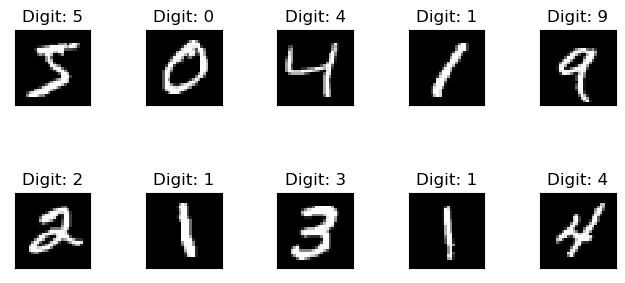

In [100]:
fig = plt.figure()
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(trainX[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(trainY[i]))
  plt.xticks([])
  plt.yticks([])


In [101]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [102]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
history = model.fit(trainX, trainY, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 6s 51ms/step - loss: 0.4240 - accuracy: 0.8696
Epoch 2/10
120/120 [==============================] - 6s 49ms/step - loss: 0.1812 - accuracy: 0.9483
Epoch 3/10
120/120 [==============================] - 6s 49ms/step - loss: 0.1353 - accuracy: 0.9616
Epoch 4/10
120/120 [==============================] - 6s 51ms/step - loss: 0.1096 - accuracy: 0.9693
Epoch 5/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0921 - accuracy: 0.9749
Epoch 6/10
120/120 [==============================] - 7s 60ms/step - loss: 0.0797 - accuracy: 0.9781
Epoch 7/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0709 - accuracy: 0.9803
Epoch 8/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0628 - accuracy: 0.9829
Epoch 9/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0580 - accuracy: 0.9844
Epoch 10/10
120/120 [==============================] - 6s 50ms/step - loss: 0.0528 - accura

In [104]:
score = model.evaluate(testX, testY, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.05880570039153099
accuracy= 0.9810000061988831


In [105]:
indices = np.random.choice(testX.shape[0], size=10, replace=False)
images = testX[indices]
labels = testY[indices]

In [106]:
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
print('Predicted labels:', predicted_labels)

1/1 [==============================] - 0s 56ms/step
Predicted labels: [7 1 2 0 5 5 3 3 0 8]


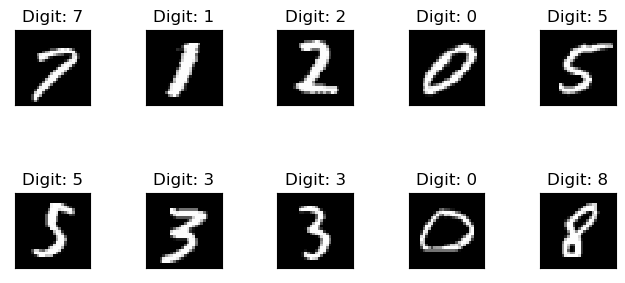

In [107]:
fig = plt.figure()
for i in range(len(predicted_labels)):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(predicted_labels[i]))
  plt.xticks([])
  plt.yticks([])
